# Non-Graded Challenge 11
---
> Arief Luqmannurhakim
>
> Batch 001 -- FTDS
>
> masalah colum yg pk percent harus jadi float

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nelrickeine","key":"0f603eceb6345956a665633e2947a56f"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-07-23 06:49:54           9662  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5904  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2189  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2470  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [4]:
!kaggle datasets download -d hendratno/covid19-indonesia --unzip

  0% 0.00/633k [00:00<?, ?B/s]
100% 633k/633k [00:00<00:00, 42.6MB/s]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('covid_19_indonesia_time_series_all.csv', chunksize=1000)
covid_data = []
for i in df:
  covid_data.append(i)

covid_df = pd.concat(covid_data, axis=0, ignore_index=True)

In [29]:
covid_df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
0,1/8/2020,ID-JI,Jawa Timur,9,3,1,5,9,5,10,-6,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.22,0.22,0.07,0.12,55.56%,111.11%,NaN,NaN,NaN,NaN,NaN,NaN
1,1/9/2020,ID-JI,Jawa Timur,0,1,23,-24,9,6,33,-30,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.15,66.67%,366.67%,0.0,0.33,NaN,NaN,NaN,NaN
2,1/10/2020,ID-JI,Jawa Timur,0,1,14,-15,9,7,47,-45,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.17,77.78%,522.22%,1.0,1.00,NaN,NaN,NaN,NaN
3,1/11/2020,ID-JI,Jawa Timur,0,3,8,-11,9,10,55,-56,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.25,111.11%,611.11%,1.0,3.00,NaN,NaN,NaN,NaN
4,1/12/2020,ID-JI,Jawa Timur,0,3,1,-4,9,13,56,-60,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.32,144.44%,622.22%,1.0,1.00,NaN,NaN,NaN,NaN


In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         16283 non-null  object 
 1   Location ISO Code            16283 non-null  object 
 2   Location                     16283 non-null  object 
 3   New Cases                    16283 non-null  int64  
 4   New Deaths                   16283 non-null  int64  
 5   New Recovered                16283 non-null  int64  
 6   New Active Cases             16283 non-null  int64  
 7   Total Cases                  16283 non-null  int64  
 8   Total Deaths                 16283 non-null  int64  
 9   Total Recovered              16283 non-null  int64  
 10  Total Active Cases           16283 non-null  int64  
 11  Location Level               16283 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

> drop the nan columns, especially t 0 non-null which mean it doesn't have any data

In [30]:
zero_data = covid_df.isnull().sum() == len(covid_df)
covid_df.drop(columns=covid_df.columns[zero_data], inplace=True)

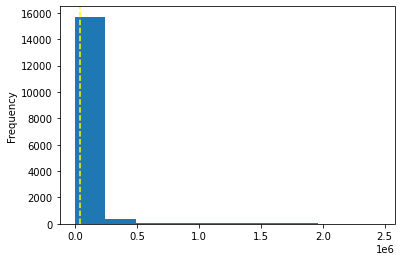

In [10]:
covid_df['Total Cases'].plot(kind='hist', bins=10)
plt.axvline(covid_df['Total Cases'].mean(), color='yellow', linestyle='dashed')
plt.show()

> fill NaN column with mean for numeric and mode for string/categorical

In [31]:
covid_df[['Case Fatality Rate', 'Case Recovered Rate']] =  covid_df[['Case Fatality Rate', 'Case Recovered Rate']].applymap(lambda x: x.replace('%', '')).astype('float32').applymap(lambda x: round(x,2))

In [32]:
# Numeric Columns
colum_types = covid_df[~covid_df['Special Status'].isnull()].dtypes
num_col = covid_df.columns[(colum_types == float) | (colum_types == int)]
num_col = [col for col in num_col]
dict_num_col = {}
for col in num_col:
  dict_num_col[col] = covid_df.loc[:, [col]].agg('mean').apply(lambda x: round(x, 2)).values[0]


In [33]:
dict_num_col

{'Area (km2)': 114077.49,
 'Case Fatality Rate': 7.44,
 'Case Recovered Rate': 100.95,
 'Growth Factor of New Cases': 1.44,
 'Growth Factor of New Deaths': 1.08,
 'Latitude': -2.85,
 'Longitude': 113.43,
 'New Active Cases': 45.34,
 'New Cases': 301.27,
 'New Cases per Million': 20.67,
 'New Deaths': 7.92,
 'New Deaths per Million': 0.46,
 'New Recovered': 248.02,
 'Population': 16057038.01,
 'Population Density': 768.31,
 'Total Active Cases': 4608.55,
 'Total Cases': 42746.74,
 'Total Cases per Million': 2977.16,
 'Total Cities': 6.05,
 'Total Deaths': 1243.92,
 'Total Deaths per Million': 72.46,
 'Total Districts': 432.6,
 'Total Recovered': 36894.27,
 'Total Regencies': 24.79,
 'Total Rural Villages': 4631.86,
 'Total Urban Villages': 524.46}

In [34]:
covid_df.fillna(value=dict_num_col, inplace=True)

In [35]:
# Categorical Columns
colum_types = covid_df[~covid_df['Special Status'].isnull()].dtypes
cat_col = covid_df.columns[(colum_types == object) & (covid_df.columns != 'Date')]
cat_col = [col for col in cat_col]
dict_cat_col = {}
for col in cat_col:
  dict_cat_col[col] = covid_df[col].mode()


In [36]:
dict_cat_col

{'Continent': 0    Asia
 dtype: object, 'Country': 0    Indonesia
 dtype: object, 'Island': 0    Sumatera
 dtype: object, 'Location': 0    Jawa Timur
 dtype: object, 'Location ISO Code': 0    ID-JI
 dtype: object, 'Location Level': 0    Province
 dtype: object, 'Province': 0    Jawa Timur
 dtype: object, 'Special Status': 0    Daerah Khusus
 dtype: object, 'Time Zone': 0    UTC+07:00
 dtype: object}

In [37]:
covid_df.fillna(value=dict_cat_col, inplace=True)

# Find Central-Tendency
---
> We need to split the data into 2 types :
 1. Numeric/float/int --> We will use Mean, median, mode
 2. String/Object --> We will use mode

In [38]:
# Numeric Columns

colum_types = covid_df[~covid_df['Special Status'].isnull()].dtypes
num_col = covid_df.columns[(colum_types == float) | (colum_types == int)]
col = [col for col in num_col]

covid_df[col]

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,9,3,1,5,9,5,10,-6,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.22,0.22,0.07,0.12,55.56,111.11,1.44,1.08
1,0,1,23,-24,9,6,33,-30,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.15,66.67,366.67,0.00,0.33
2,0,1,14,-15,9,7,47,-45,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.17,77.78,522.22,1.00,1.00
3,0,3,8,-11,9,10,55,-56,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.25,111.11,611.11,1.00,3.00
4,0,3,1,-4,9,13,56,-60,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.32,144.44,622.22,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16278,124,1,3,120,12447,252,10412,1783,15,2.0,219,377.0,1911.0,38068,2635461,69.23,122.070311,-4.124689,47.05,4722.89,0.38,95.62,2.02,83.65,0.92,0.50
16279,278,9,9,260,17424,572,15525,1327,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,105.23,6595.29,3.41,216.51,3.28,89.10,1.24,9.00
16280,718,10,275,433,55675,1259,48840,5576,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,130.09,10087.43,1.81,228.11,2.26,87.72,0.93,1.00
16281,341,6,221,114,31147,1569,27088,2490,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,41.50,3790.30,0.73,190.93,5.04,86.97,1.15,0.38


In [39]:
covid_df[col].describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
count,16283.000000,16283.000000,16283.000000,16283.000000,1.628300e+04,16283.000000,1.628300e+04,16283.000000,16283.000000,16283.000000,16283.000000,16283.000000,16283.000000,1.628300e+04,1.628300e+04,16283.000000,16283.000000,16283.000000,16283.000000,16283.000000,16283.000000,16283.000000,16283.000000,16283.000000,16283.000000,16283.000000
mean,301.271879,7.919364,248.015783,45.336732,4.274674e+04,1243.917644,3.689427e+04,4608.549714,24.792913,6.049589,432.595283,524.458187,4631.859827,1.140775e+05,1.605704e+07,768.308731,113.427502,-2.850093,20.673622,2977.160052,0.463346,72.462398,7.435009,100.952749,1.437794,1.084292
std,1330.028199,32.171434,997.784905,550.203700,1.784936e+05,4944.634529,1.580017e+05,17670.075450,69.658831,16.458942,1215.579638,1427.813287,12629.540001,3.247192e+05,4.546363e+07,2784.573161,9.860245,3.618674,45.319811,4987.373956,1.096785,99.203343,58.750444,382.220459,3.284102,1.829276
min,0.000000,0.000000,0.000000,-8381.000000,1.000000e+00,0.000000,0.000000e+00,-2395.000000,1.000000,1.000000,44.000000,35.000000,275.000000,6.640000e+02,6.484070e+05,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,2.000000,-7.000000,7.265000e+02,23.000000,3.860000e+02,162.500000,8.000000,1.000000,116.000000,110.000000,995.000000,1.857200e+04,2.570289e+06,47.790000,106.109004,-6.204699,1.645000,166.695000,0.000000,4.980000,1.730000,60.720000,0.670000,0.770000
50%,39.000000,1.000000,24.000000,2.000000,5.941000e+03,149.000000,4.484000e+03,851.000000,12.000000,2.000000,171.000000,197.000000,1742.000000,4.671700e+04,4.340348e+06,103.840000,112.732941,-2.993595,7.670000,1398.640000,0.110000,41.380000,2.750000,81.180000,1.000000,1.000000
75%,127.000000,4.000000,106.000000,32.000000,1.777450e+04,556.000000,1.430450e+04,2271.000000,18.000000,5.000000,289.000000,377.000000,3026.000000,7.546800e+04,9.095591e+06,262.700000,120.162056,-0.086475,21.870000,3817.535000,0.550000,93.520000,4.460000,89.680000,1.440000,1.080000
max,38391.000000,1040.000000,28975.000000,18504.000000,2.455912e+06,64631.000000,2.023548e+06,367733.000000,416.000000,98.000000,7230.000000,8488.000000,74953.000000,1.916907e+06,2.651855e+08,16334.310000,138.696030,4.225615,1208.910000,58673.660000,63.800000,854.680000,2800.000000,16300.000000,175.000000,134.500000


In [40]:
covid_df[col].agg(['mean','median','std','var'])

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
mean,3.012719e+02,7.919364,248.015783,45.336732,4.274674e+04,1.243918e+03,3.689427e+04,4.608550e+03,24.792913,6.049589,4.325953e+02,5.244582e+02,4.631860e+03,1.140775e+05,1.605704e+07,7.683087e+02,113.427502,-2.850093,20.673622,2.977160e+03,0.463346,72.462398,7.435009,100.952749,1.437794,1.084292
median,3.900000e+01,1.000000,24.000000,2.000000,5.941000e+03,1.490000e+02,4.484000e+03,8.510000e+02,12.000000,2.000000,1.710000e+02,1.970000e+02,1.742000e+03,4.671700e+04,4.340348e+06,1.038400e+02,112.732941,-2.993595,7.670000,1.398640e+03,0.110000,41.380000,2.750000,81.180000,1.000000,1.000000
std,1.330028e+03,32.171434,997.784905,550.203700,1.784936e+05,4.944635e+03,1.580017e+05,1.767008e+04,69.658831,16.458942,1.215580e+03,1.427813e+03,1.262954e+04,3.247192e+05,4.546363e+07,2.784573e+03,9.860245,3.618674,45.319811,4.987374e+03,1.096785,99.203343,58.750444,382.220459,3.284102,1.829276
var,1.768975e+06,1035.001175,995574.716678,302724.111086,3.185998e+10,2.444941e+07,2.496455e+10,3.122316e+08,4852.352764,270.896765,1.477634e+06,2.038651e+06,1.595053e+08,1.054426e+11,2.066942e+15,7.753848e+06,97.224423,13.094803,2053.885314,2.487390e+07,1.202938,9841.303197,3451.614728,146092.479216,10.785328,3.346250


In [41]:
# Categorical Columns

colum_types = covid_df[~covid_df['Special Status'].isnull()].dtypes
num_col = covid_df.columns[(colum_types == object)]
col_cat = [col for col in num_col]

covid_df[col_cat]

,Date,Location ISO Code,Location,Location Level,Province,Country,Continent,Island,Time Zone,Special Status
0,1/8/2020,ID-JI,Jawa Timur,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus
1,1/9/2020,ID-JI,Jawa Timur,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN
2,1/10/2020,ID-JI,Jawa Timur,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN
3,1/11/2020,ID-JI,Jawa Timur,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN
4,1/12/2020,ID-JI,Jawa Timur,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN
...,...,...,...,...,...,...,...,...,...,...
16278,7/9/2021,ID-SG,Sulawesi Tenggara,Province,Sulawesi Tenggara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN
16279,7/9/2021,ID-SA,Sulawesi Utara,Province,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN
16280,7/9/2021,ID-SB,Sumatera Barat,Province,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN
16281,7/9/2021,ID-SS,Sumatera Selatan,Province,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN


In [42]:
covid_df[col_cat].agg(['mode'])

,Date,Location ISO Code,Location,Location Level,Province,Country,Continent,Island,Time Zone,Special Status
,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode
0,1/1/2021,ID-JI,Jawa Timur,Province,Jawa Timur,Indonesia,Asia,Sumatera,UTC+07:00,Daerah Khusus
1,1/10/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/11/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/12/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/13/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
452,9/5/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
453,9/6/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,9/7/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
